### Train Yolo net on custom data to detect victims


In [1]:
!pip install roboflow

In [70]:
from roboflow import Roboflow
rf = Roboflow(api_key="KGLlzmynOiNRRpK83jdB")
project = rf.workspace("ppmrob").project("ppmrob")
dataset = project.version(7).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ppmrob-7 in yolov5pytorch:: 100%|██████████| 1012/1012 [00:03<00:00, 333.91it/s]


### Train Yolo net on custom data to detect victims

In [6]:
dataset_location = "ppmrob-3"
# DATASET INFO
%cat {dataset.location}/data.yaml

names:
- victim
nc: 1
roboflow:
  license: CC BY 4.0
  project: ppmrob
  url: https://universe.roboflow.com/ppmrob/ppmrob/dataset/3
  version: 3
  workspace: ppmrob
test: ../test/images
train: ppmrob-3/train/images
val: ppmrob-3/valid/images


In [34]:
%cd yolov5-master

/mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master


In [ ]:
num_classes = 1

In [9]:
%cat yolov5-master/models/yolov5s.yaml

# python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --cfg custom_yolov5s.yaml --weights '' --name custom_yolov5s_results

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [74]:
dataset_location = "../ppmrob-7"

!python train.py --img 416 --batch 8 --epochs 300 --data {dataset.location}/data.yaml --cfg ./models/yolocustom.yaml --weights '' --name yolov5s_results  --cache

train: weights=, cfg=./models/yolocustom.yaml, data=/mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master/ppmrob-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2024-2-1 Python-3.9.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

hyperparameters: lr0=0.01, lrf=0.01, mome

In [25]:
%cat {dataset_location}/data.yaml

names:
- victim
nc: 1
roboflow:
  license: CC BY 4.0
  project: ppmrob
  url: https://universe.roboflow.com/ppmrob/ppmrob/dataset/3
  version: 3
  workspace: ppmrob
test: ../test/images
train: ppmrob-3/train/images
val: ppmrob-3/valid/images


In [22]:
%cd yolov5-master

/mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master


In [39]:
%load_ext tensorboard
%tensorboard --logdir runs

Launching TensorBoard...

GROUND TRUTH TRAINING DATA:


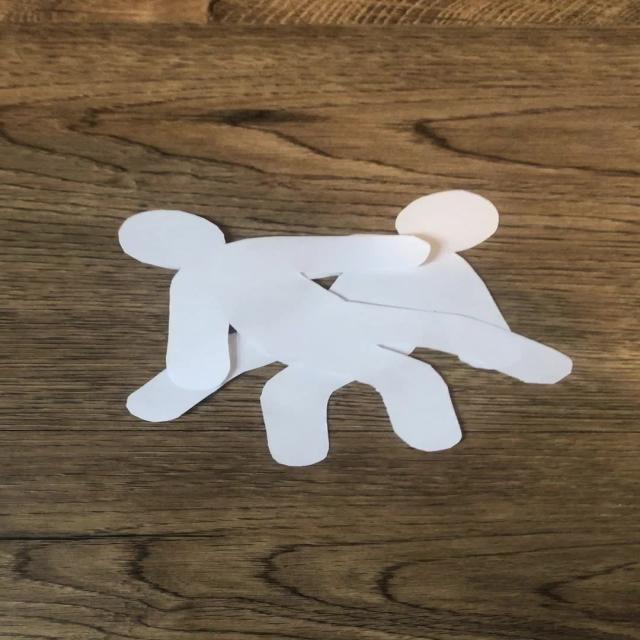

In [57]:
print("GROUND TRUTH TRAINING DATA:")
from IPython.display import Image
Image(filename='./ppmrob-4/train/images/victim0001_jpg.rf.58dcd6a049ffef5d29ed92e9b695b21f.jpg', width=900)

In [48]:
%cd yolo_train/yolov5-master

/mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master


In [77]:
!python detect.py --weights runs/train/yolov5s_results21/weights/best.pt --img 416 --conf 0.85 --source ppmrob-4/test/images

detect: weights=['runs/train/yolov5s_results21/weights/best.pt'], source=ppmrob-4/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.85, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-2-1 Python-3.9.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

Fusing layers... 
yolocustom summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/61 /mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master/ppmrob-4/test/images/victim0005_jpg.rf.399b63bfb784f925047d34cb8239eb99.jpg: 416x416 1 victim, 5.7ms
image 2/61 /mnt/f/PycharmProjects/ppmrob/yolo_train/yolov5-master/ppmrob-4/test/images/victim0038_jpg.rf.fa03c7bc35359bf787be83fe97aba16d.